In [7]:
import qiskit
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT
import numpy as np
import math


In [8]:
def oracle(mark_state):
    if mark_state == '00':
        qc.x([0, 1])  
        qc.cz(0, 1)  
        qc.x([0, 1])
    elif mark_state == '01':
        qc.x(1)  
        qc.cz(0, 1)  
        qc.x(1)
    elif mark_state == '10':
        qc.x(0)  
        qc.cz(0, 1)  
        qc.x(0)
    elif mark_state == '11':
        qc.cz(0, 1)


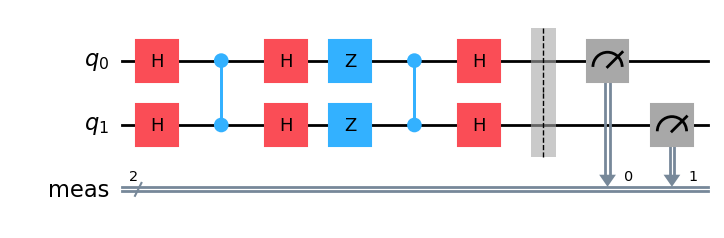

In [9]:
qc = QuantumCircuit(2)

mark_state = '11'

qc.h([0, 1])

oracle(mark_state)


qc.h([0, 1])
qc.z([0, 1])
qc.cz(0, 1)
qc.h([0, 1])

qc.measure_all()

qc.draw('mpl')


Counts: {'11': 1024}


C:\Users\26550\AppData\Local\Temp\ipykernel_36560\3928821450.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


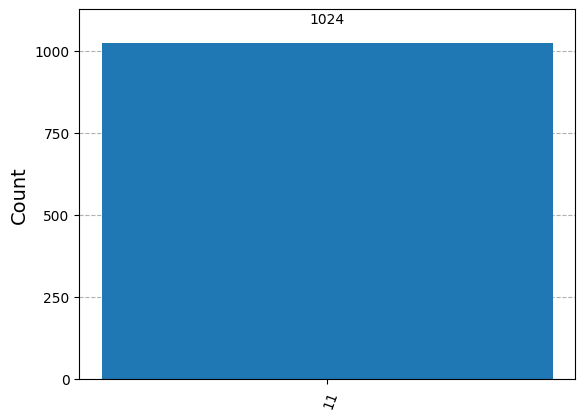

In [10]:
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()
counts = result.get_counts(qc)
print("Counts:", counts)

# Plot the result
plot_histogram(counts)

In [11]:
 
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
job = Sampler(backend).run(qc)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)



C:\Users\26550\AppData\Local\Temp\ipykernel_36560\1632933720.py:5: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  job = Sampler(backend).run(qc)


IBMInputValueError: 'The instruction h on qubits (0,) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/run/primitives-examples) to see this coupled with operator transformations.'